# Obrazová analytika

Tým - Mechl, Míča, Hruš, Hufnagel

In [27]:
from google.cloud import vision
from google.oauth2 import service_account

###### Nahrání knihoven pro práci s obrázky

In [28]:
from IPython.display import Image
import matplotlib.pyplot as plt
from matplotlib.image import imread
import io

###### Nastavení credentials

In [29]:
creds = service_account.Credentials.from_service_account_file('./credentials.json')

In [30]:
client = vision.ImageAnnotatorClient(credentials=creds)

###### zpracování celého adresáře

In [31]:
import os

In [32]:
path = './data/tym8'

In [33]:
def get_labels(image):
    with io.open(image, 'rb') as image_file:
        content = image_file.read()
    image = vision.Image(content = content)
    labels = client.label_detection(image=image).label_annotations
    return labels

In [34]:
labels_images = {}

In [35]:
directories = os.listdir(path)

In [36]:
print(directories)

['123101.jpg', '123203.jpg', '134300.jpg', '135300.jpg', '136203.jpg', '136402.jpg', '136502.jpg', '136601.jpg', '136702.jpg', '142701.jpg', '148202.jpg', '148600.jpg', '148801.jpg', '149000.jpg', '149603.jpg']


In [37]:
for i in directories:
    lbls = get_labels(os.path.join(path, i))
    lbl_set = [i.description for i in lbls]
    labels_images[os.path.join(path, i)] = lbl_set

In [38]:
print(labels_images)

{'./data/tym8\\123101.jpg': ['Interior design', 'Decoration', 'Interior design', 'Temple', 'Place of worship', 'Light fixture', 'Ornament', 'Holy places', 'Tradition', 'Shrine'], './data/tym8\\123203.jpg': ['Decoration', 'Tradition', 'Ornament', 'Box'], './data/tym8\\134300.jpg': ['Watercraft', 'Water', 'Water resources', 'Bank', 'Boat', 'Waterway', 'Boats and boating--Equipment and supplies', 'Boating', 'Channel', 'Lake'], './data/tym8\\135300.jpg': ['Grass', 'Green', 'Grass family', 'Terrestrial plant', 'Field', 'Grassland', 'Agriculture', 'Groundcover', 'Meadow', 'Plantation'], './data/tym8\\136203.jpg': ['Mountainous landforms', 'Winter', 'Mountain range', 'Slope', 'Glacial landform', 'Freezing', 'Hill', 'Summit', 'Mountain', 'Terrain'], './data/tym8\\136402.jpg': ['Mountainous landforms', 'Winter', 'Mountain range', 'Mountain', 'Summit', 'Highland', 'Slope', 'Freezing', 'Glacial landform', 'Hill station'], './data/tym8\\136502.jpg': ['Groundcover', 'Shadow', 'Water feature'], './d

In [39]:
for k, v in labels_images.items():
    print(k) #v da values

./data/tym8\123101.jpg
./data/tym8\123203.jpg
./data/tym8\134300.jpg
./data/tym8\135300.jpg
./data/tym8\136203.jpg
./data/tym8\136402.jpg
./data/tym8\136502.jpg
./data/tym8\136601.jpg
./data/tym8\136702.jpg
./data/tym8\142701.jpg
./data/tym8\148202.jpg
./data/tym8\148600.jpg
./data/tym8\148801.jpg
./data/tym8\149000.jpg
./data/tym8\149603.jpg


In [40]:
tags = {}
for k, v in labels_images.items():
    for j in v:
        pocet = tags.get(j, [0, []])[0] + 1
        seznam = tags.get(j, [0, []])[1]
        seznam.append(k)
        tags[j] = [pocet, seznam]

In [41]:
sort_tabs = sorted(tags.items(), key = lambda x: x[1], reverse = True)

In [42]:
print(sort_tabs[0])

('Mountainous landforms', [3, ['./data/tym8\\136203.jpg', './data/tym8\\136402.jpg', './data/tym8\\136601.jpg']])


###### Doporučení dovolené na základě charakteru - hory, příroda, venkov apod..

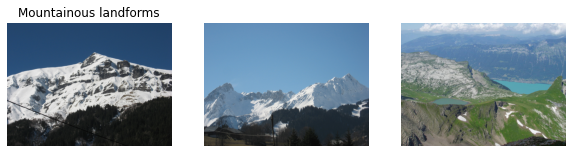

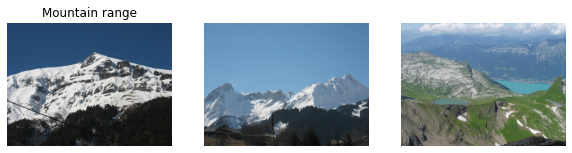

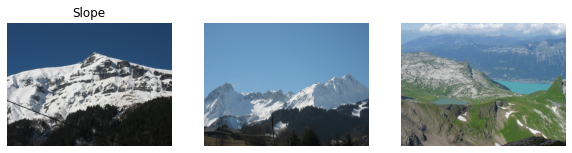

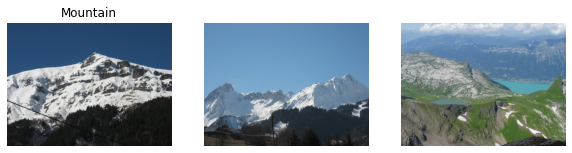

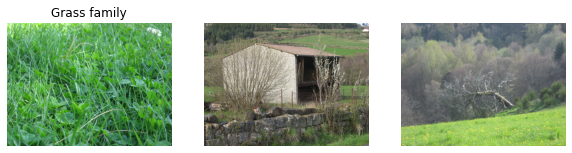

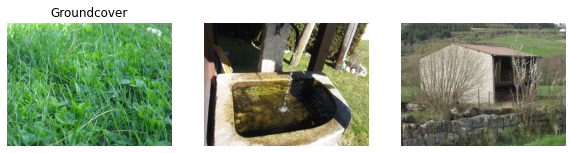

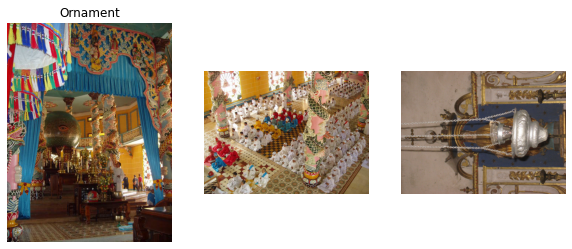

In [43]:
for k in range(7):
    pocet = sort_tabs[0][1][0]
    f, ax = plt.subplots(1, pocet, figsize = (10, 10))
    ax[0].set_title(sort_tabs[k][0])

    for i in range(pocet):
        ax[i].imshow(imread(sort_tabs[k][1][1][i]))
        ax[i].axis('off')

    plt.show()